In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Basic stats (number words, articles, words/articles...)

In [3]:
with open("./data/Pablo_Iglesias_Podemos.csv") as f:
    for line in f:
        date, newspaper, content = line.split("\t")
        number_words = len(content.split(" "))
        print("We have {0} words in date {1}".format(number_words,date))
        

We have 543 words in date December 16, 2015 Wednesday  2ª Ed. Barna Edición
We have 543 words in date December 16, 2015 Wednesday  2ª Ed. Madrid Edición
We have 296 words in date December 16, 2015 Wednesday  2ª Ed. Madrid Edición
We have 543 words in date December 16, 2015 Wednesday  Nacional Edición
We have 296 words in date December 16, 2015 Wednesday  Nacional Edición
We have 716 words in date December 16, 2015 Wednesday  Comunidad Valenciana Edición
We have 560 words in date December 17, 2015 Thursday  2ª Ed. Barna Edición
We have 410 words in date December 17, 2015 Thursday  1ª Ed. Barna Edición
We have 397 words in date December 17, 2015 Thursday  1ª Ed. Barna Edición
We have 620 words in date December 17, 2015 Thursday  Andalucía Edición
We have 94 words in date December 17, 2015 Thursday  Comunidad Valenciana Edición
We have 627 words in date December 17, 2015 Thursday  Nacional Edición
We have 93 words in date December 17, 2015 Thursday  Nacional Edición
We have 560 words in d

## Counting words

In [4]:
with open("./data/Pablo_Iglesias_Podemos.csv") as f:
    for i,line in enumerate(f):
        date, newspaper, content = line.split("\t")
        number_words = len(content.split(" "))
        
        frequency_las = 100*content.count("la")/number_words
        frequency_els = 100*content.count("el")/number_words
        
        print("New article number {0}. la's: {1:3.2f}%. el's {2:3.2f}%".format(i,frequency_las,frequency_els))

        
        

New article number 0. la's: 6.26%. el's 6.45%
New article number 1. la's: 6.26%. el's 6.45%
New article number 2. la's: 9.80%. el's 7.09%
New article number 3. la's: 6.26%. el's 6.45%
New article number 4. la's: 9.80%. el's 7.09%
New article number 5. la's: 7.12%. el's 6.56%
New article number 6. la's: 5.36%. el's 4.46%
New article number 7. la's: 10.00%. el's 5.37%
New article number 8. la's: 8.82%. el's 6.55%
New article number 9. la's: 5.48%. el's 5.00%
New article number 10. la's: 6.38%. el's 6.38%
New article number 11. la's: 5.42%. el's 5.10%
New article number 12. la's: 6.45%. el's 5.38%
New article number 13. la's: 5.36%. el's 4.46%
New article number 14. la's: 10.00%. el's 5.37%
New article number 15. la's: 8.82%. el's 6.55%
New article number 16. la's: 5.48%. el's 5.00%
New article number 17. la's: 6.38%. el's 6.38%
New article number 18. la's: 5.42%. el's 5.10%
New article number 19. la's: 6.45%. el's 5.38%
New article number 20. la's: 7.00%. el's 4.12%
New article number 21

## Correlating words and visualizing them

In [5]:
from scipy.stats import pearsonr, spearmanr
import pylab as plt

frequency_las = []
frequency_els = []

with open("./data/Pablo_Iglesias_Podemos.csv") as f:
    for i,line in enumerate(f):
        date, newspaper, content = line.split("\t")
        number_words = len(content.split(" "))

        frequency_las.append(100*content.count("la")/number_words)
        frequency_els.append(100*content.count("el")/number_words)


print(frequency_las[:10])
print(frequency_els[:10])
        
pearson_corr,pearson_pvalue = pearsonr(frequency_las,frequency_els)
spearmanr_corr,spearmanr_pvalue = spearmanr(frequency_las,frequency_els)

print(pearson_corr,pearson_pvalue)
print(spearmanr_corr,spearmanr_pvalue)

[6.261510128913444, 6.261510128913444, 9.797297297297296, 6.261510128913444, 9.797297297297296, 7.122905027932961, 5.357142857142857, 10.0, 8.816120906801007, 5.483870967741935]
[6.445672191528545, 6.445672191528545, 7.094594594594595, 6.445672191528545, 7.094594594594595, 6.564245810055866, 4.464285714285714, 5.365853658536586, 6.54911838790932, 5.0]
-0.0594241938359 0.119148064261
-0.0589721980327 0.121987381518


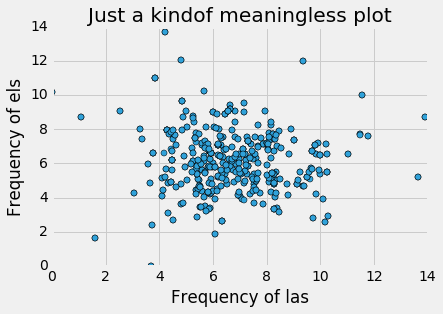

In [141]:
plt.plot(frequency_las,frequency_els,"o")
plt.xlabel("Frequency of las")
plt.ylabel("Frequency of els")
plt.title("Just a kindof meaningless plot")
plt.show()

## Counting all the words and plot histagrams

[('de', 43), ('que', 31), ('y', 27), ('el', 22), ('en', 22)]
[('de', 43), ('el', 30), ('la', 27), ('a', 22), ('en', 22)]
[('de', 10), ('la', 8), ('el', 6), ('que', 4), ('los', 3)]
[('de', 20), ('el', 16), ('los', 12), ('que', 12), ('a', 8)]
[('de', 26), ('el', 23), ('y', 19), ('en', 15), ('con', 13)]


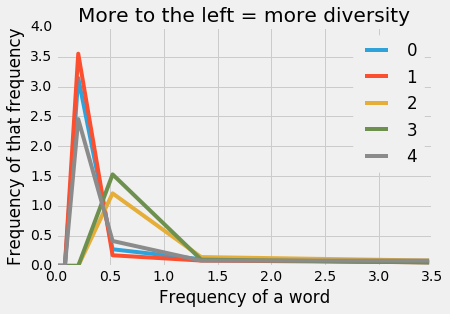

In [185]:
import pylab as plt
import numpy as np

def make_line_hist(x,minValue,maxValue,nbins=10,logscale=False):
    """
    make a line histogram (instead of bars, just the top line)
    """
    if logscale:
        freqs,bins = np.histogram(x,bins=np.logspace(np.log10(minValue),np.log10(maxValue),nbins),normed=True) 
    else:
        freqs,bins = np.histogram(x,bins=np.linspace(minValue,maxValue,nbins),normed=True)
        
    
    plt.plot((bins[:-1]+bins[1:])/2,freqs)
    return freqs
    
### Get the distribution of words and plot histogram
from collections import Counter
with open("./data/Pablo_Iglesias_Podemos.csv") as f:
    lines = sorted(set(f.readlines()))
    for line in lines:
        date, newspaper, content = line.rsplit("\t")
        number_words = len(content.split(" "))

        counter = Counter(content.split(" "))
        print(counter.most_common(5))
        elements,count = zip(*counter.most_common())
        freq = 100*np.array(count)/number_words
        
        freqs = make_line_hist(freq,0.001,5,10,logscale=True)
     
        
plt.legend([0,1,2,3,4,5])
plt.xlabel("Frequency of a word")
plt.ylabel("Frequency of that frequency")
plt.title("More to the left = more diversity")
plt.show()



## Visualizing frequency of a word over time
### Step 1. Give some format

In [6]:
##Formats the date

from dateutil.parser import parse
with open("./data/Pablo_Iglesias_Podemos.csv") as f, open("./data/Pablo_Iglesias_Podemos_date_formatted.csv","w+") as fOut:
    lines = sorted(set(f.readlines()))
    for i,line in enumerate(lines):
        date, newspaper, content = line.rsplit("\t")
        number_words = len(content.split(" "))
        corruption = content.count("corrup")
        date = parse(date,fuzzy=True,dayfirst=True)
        fOut.write("{0}\t{1}\n".format(date.date(),100*corruption/number_words))

with open("./data/Albert_Rivera_Ciudadanos.csv") as f, open("./data/Albert_Rivera_Ciudadanos_date_formatted.csv","w+") as fOut:
    lines = sorted(set(f.readlines()))
    for i,line in enumerate(lines):
        date, newspaper, content = line.rsplit("\t")
        number_words = len(content.split(" "))
        corruption = content.count("corrup")        
        date = parse(date,fuzzy=True,dayfirst=True)
        fOut.write("{0}\t{1}\n".format(date.date(),100*corruption/number_words))

### Step 2. Group (freq is too low)

In [7]:
import pandas as pd
df = pd.read_csv("./data/Pablo_Iglesias_Podemos_date_formatted.csv",sep="\t",header=None,index_col=None)
df.columns = ["Date","Perc"]
print(df.loc[:10,:])

          Date      Perc
0   2015-12-01  0.000000
1   2015-12-01  0.000000
2   2015-12-01  0.000000
3   2015-12-01  0.000000
4   2015-12-01  0.000000
5   2015-12-01  0.000000
6   2015-12-01  0.000000
7   2015-12-01  0.869565
8   2015-12-01  0.000000
9   2015-12-01  0.000000
10  2015-12-01  0.000000


ValueError: could not convert string to float: '2016-01-19'

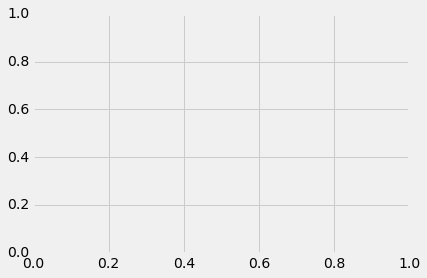

In [8]:
### Group by date so we can plot
df_podemos = pd.read_csv("./data/Pablo_Iglesias_Podemos_date_formatted.csv",sep="\t",header=None,index_col=None)
df_podemos.columns = ["Date","Perc"]
df_podemos = df_podemos.groupby("Date").mean().reset_index()


df_ciudadnos = pd.read_csv("./data/Albert_Rivera_Ciudadanos_date_formatted.csv",sep="\t",header=None,index_col=None)
df_ciudadnos.columns = ["Date","Perc"]
df_ciudadnos = df_ciudadnos.groupby("Date").mean().reset_index()

plt.plot(df_podemos["Date"],df_podemos["Perc"])
plt.plot(df_ciudadnos["Date"],df_ciudadnos["Perc"])
plt.show()

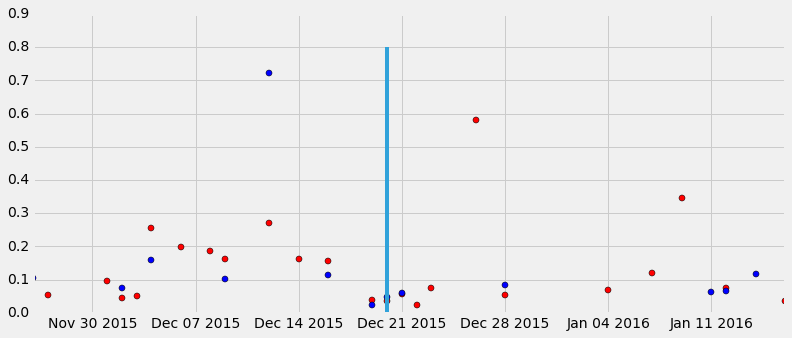

In [10]:
## Formats the date again, to plot it
from dateutil.parser import parse
df_podemos = pd.read_csv("./data/Pablo_Iglesias_Podemos_date_formatted.csv",sep="\t",header=None,index_col=None)
df_podemos.columns = ["Date","Perc"]
df_podemos = df_podemos.groupby("Date").mean().reset_index()
df_podemos = df_podemos.loc[df_podemos["Perc"]>0,:]

dates_podemos = []
for date in df_podemos["Date"]:
    dates_podemos.append(parse(date))

df_ciudadnos = pd.read_csv("./data/Albert_Rivera_Ciudadanos_date_formatted.csv",sep="\t",header=None,index_col=None)
df_ciudadnos.columns = ["Date","Perc"]
df_ciudadnos = df_ciudadnos.groupby("Date").mean().reset_index()
df_ciudadnos = df_ciudadnos.loc[df_ciudadnos["Perc"]>0,:]

dates_ciudadanos = []
for date in df_ciudadnos["Date"]:
    dates_ciudadanos.append(parse(date))


plt.figure(figsize=(12,5))
plt.plot(dates_podemos,df_podemos["Perc"],"o",color="Red")
plt.plot(dates_ciudadanos,df_ciudadnos["Perc"],"o",color="Blue")

elections = parse("Dec 20, 2015")
plt.plot([elections,elections],[0,0.8])
plt.show()

## Cross-correlation time series of frequencies (Hints on causality)

In [242]:
from dateutil.parser import parse
from scipy.stats import pearsonr, spearmanr

df_podemos = pd.read_csv("./data/Pablo_Iglesias_Podemos_date_formatted.csv",sep="\t",header=None,index_col=None)
df_podemos.columns = ["Date","Perc"]
df_podemos = df_podemos.groupby("Date").mean().reset_index()
df_podemos = df_podemos.loc[df_podemos["Perc"]>0,:]

df_ciudadnos = pd.read_csv("./data/Albert_Rivera_Ciudadanos_date_formatted.csv",sep="\t",header=None,index_col=None)
df_ciudadnos.columns = ["Date","Perc"]
df_ciudadnos = df_ciudadnos.groupby("Date").mean().reset_index()
df_ciudadnos = df_ciudadnos.loc[df_ciudadnos["Perc"]>0,:]



         Date    Perc_x    Perc_y
0  2015-12-02  0.045045  0.073358
1  2015-12-04  0.254674  0.157816
2  2015-12-09  0.162224  0.102564
3  2015-12-12  0.269706  0.723186
4  2015-12-16  0.157120  0.113122
5  2015-12-19  0.038124  0.022862
6  2015-12-20  0.034619  0.048924
7  2015-12-21  0.055280  0.060721
8  2015-12-28  0.054705  0.084746
9  2016-01-12  0.074020  0.066578


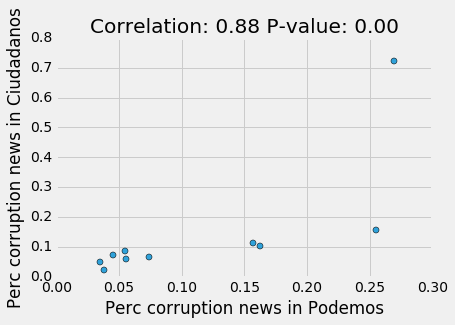

In [18]:
#Correlation
df_both = pd.merge(df_podemos,df_ciudadnos,on="Date")
print(df_both)
plt.plot(df_both["Perc_x"],df_both["Perc_y"],"o")
plt.xlabel("Perc corruption news in Podemos")
plt.ylabel("Perc corruption news in Ciudadanos")
spearmanr_corr,spearmanr_pvalue = spearmanr(df_both["Perc_x"],df_both["Perc_y"])
plt.title("Correlation: {0:2.2f} P-value: {1:2.2f}".format(spearmanr_corr,spearmanr_pvalue))

plt.show()

Typically news talk about corruption in Podemos first (lag to the left) and for a while 
       (elevated for a couple weeks) before talking about corruption in Ciudadanos 


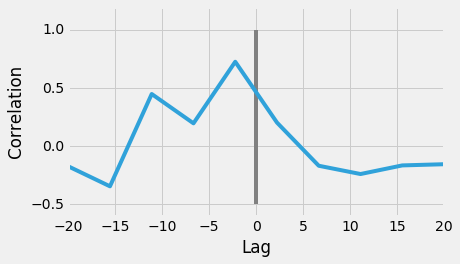

In [288]:
def cross_correlation(x,y,time):
    """
    Calculates the normalized cross-correlation and plots it
    """    
    import numpy as np
    modeC = "same"
    x = (x - np.mean(x))/np.std(x)
    y =  (y - np.mean(y))/np.std(y)

    timeInt = np.diff(time).mean().days
    numPoints = len(x)
    fig = plt.figure(figsize=(6,3.5))        
    d = np.correlate(y,x,modeC)

    plt.plot([0,0],[-0.5,1],color="grey")
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.plot(np.linspace(len(x)/2*timeInt,-len(x)/2*timeInt,len(x)),d/numPoints)

        
dates = []
for date in df_both["Date"]:
    dates.append(parse(date))
    
cross_correlation(df_both["Perc_x"],df_both["Perc_y"],dates)
print("Typically news talk about corruption in Podemos first (lag to the left) and for a while \n \
      (elevated for a couple weeks) before talking about corruption in Ciudadanos ")

## Statistics

In [13]:
import numpy as np

#t-test
from scipy.stats import ttest_ind 
population1 = np.random.normal(10,5,size=1000)
population2 = np.random.normal(9,5,size=1000)

make_line_hist(population1,-10,30,10)
make_line_hist(population2,-10,30,10)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print(ttest_ind(population1,population2))

#non-parametric alternative of t-test
from scipy.stats import mannwhitneyu
print(mannwhitneyu(population1,population2))

NameError: name 'make_line_hist' is not defined

In [15]:
#anova
import numpy as np
from scipy.stats import f_oneway
population3 = np.random.normal(9.5,5,size=1000)
print(f_oneway(population1, population2, population3)  )




F_onewayResult(statistic=13.599112041486856, pvalue=1.3201359127709691e-06)


In [16]:
#linear regression
import pandas as pd
import statsmodels.formula.api as sm

df = pd.DataFrame(dict({"X":population1, "Y1":population2,"Y2":population3}))


result = sm.ols(formula="X ~ Y1 *Y2", data=df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5799
Date:                Thu, 21 Jan 2016   Prob (F-statistic):              0.628
Time:                        13:06:56   Log-Likelihood:                -3007.4
No. Observations:                1000   AIC:                             6023.
Df Residuals:                     996   BIC:                             6042.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.4559      0.661     15.828      0.000         9.160    11.752
Y1            -0.0249      0.064     -0.387      0.699        -0.151     0.101
Y2            -0.0223      0.060     -0.370      0.711        -0.141     0.096
Y1:Y2         -0.0006      0.006     -0.102      0.919        -0.012     0.011
==============================================================================
Omnibus:                        0.380   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.399
Skew:                          -0.047   Prob(JB):                        0.819
Kurtosis:                       2.975   Cond. No.                         468.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print(df_both)
from scipy.stats import mannwhitneyu
print(mannwhitneyu(df_both["Perc_x"],df_both["Perc_y"]))

         Date    Perc_x    Perc_y
0  2015-12-02  0.045045  0.073358
1  2015-12-04  0.254674  0.157816
2  2015-12-09  0.162224  0.102564
3  2015-12-12  0.269706  0.723186
4  2015-12-16  0.157120  0.113122
5  2015-12-19  0.038124  0.022862
6  2015-12-20  0.034619  0.048924
7  2015-12-21  0.055280  0.060721
8  2015-12-28  0.054705  0.084746
9  2016-01-12  0.074020  0.066578
MannwhitneyuResult(statistic=47.0, pvalue=0.42505336956926293)


## Teaser for next day: Happiness
http://www.uvm.edu/storylab/2014/11/09/the-happiest-character-on-seinfeld-was/

In [14]:
from labMTsimple.storyLab import *

lang = 'english'
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)
#Then we can score the text and get the word vector at the same time:
saturdayValence,saturdayFvec = emotion("saturday",labMT,shift=True,happsList=labMTvector)
sundayValence,tuesdayFvec = emotion("sunday",labMT,shift=True,happsList=labMTvector)
mondayValence,tuesdayFvec = emotion("monday",labMT,shift=True,happsList=labMTvector)
fridayValence,tuesdayFvec = emotion("friday",labMT,shift=True,happsList=labMTvector)


print(fridayValence)
print(saturdayValence)
print(sundayValence)
print(mondayValence)




6.88
7.42
7.28
4.3
